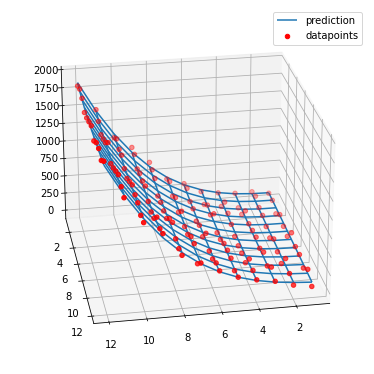

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)
# set dimension of the data
dim = 12
# create random data, which will be the target values
Z = (np.ones((dim,dim)) * np.arange(1,dim+1,1))**3 + np.random.rand(dim,dim) * 200 

# create a 2D-mesh
x = np.arange(1,dim+1).reshape(dim,1)
y = np.arange(1,dim+1).reshape(1,dim)
X,Y = np.meshgrid(x,y)

# calculate polynomial features based on the input mesh
features = {}
features['x^0*y^0'] = np.matmul(x**0,y**0).flatten()
features['x*y'] = np.matmul(x,y).flatten()
features['x*y^2'] = np.matmul(x,y**2).flatten()
features['x^2*y^0'] = np.matmul(x**2, y**0).flatten()
features['x^2*y'] = np.matmul(x**2, y).flatten()
features['x^3*y^2'] = np.matmul(x**3, y**2).flatten()
features['x^3*y'] = np.matmul(x**3, y).flatten()
features['x^0*y^3'] = np.matmul(x**0, y**3).flatten()
dataset = pd.DataFrame(features)

# fit a linear regression model
reg = LinearRegression().fit(dataset.values, Z.flatten())
# get coefficients and calculate the predictions 
z_pred = reg.intercept_ + np.matmul(dataset.values, reg.coef_.reshape(-1,1)).reshape(dim,dim)

# visualize the results
fig = plt.figure(figsize = (5,5))
ax = Axes3D(fig)
# plot the fitted curve
ax.plot_wireframe(X, Y, z_pred, label = 'prediction')
# plot the target values
ax.scatter(X, Y, Z, c = 'r', label = 'datapoints')
ax.view_init(25, 80)
plt.legend()